In [1]:
import pandas as pd
import numpy as np

In [2]:
mob_dataset = pd.read_csv("../final_mob_dataset.csv")

In [3]:
mob_dataset

,product id,price,sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,rearcam,front cam,battery,thickness
0,203,2357,10.0,135.0,5.20,424.0,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10.0,125.0,4.00,233.0,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10.0,110.0,4.70,312.0,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11.0,118.5,4.00,233.0,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11.0,125.0,4.00,233.0,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,899.5,178.0,5.46,538.0,4,1.875,68.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,899.5,170.0,5.50,534.0,4,1.975,68.0,6.000,20.00,8.0,3400,7.9
158,856,3260,899.5,150.0,5.50,401.0,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,899.5,170.0,5.50,534.0,4,1.975,68.0,6.000,20.00,8.0,3400,7.9


In [4]:
mob_dataset.isnull().sum()

product id      0
price           0
sale            0
weight          0
resolution      0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
rearcam         0
front cam       0
battery         0
thickness       0
dtype: int64

In [5]:
import seaborn as sns

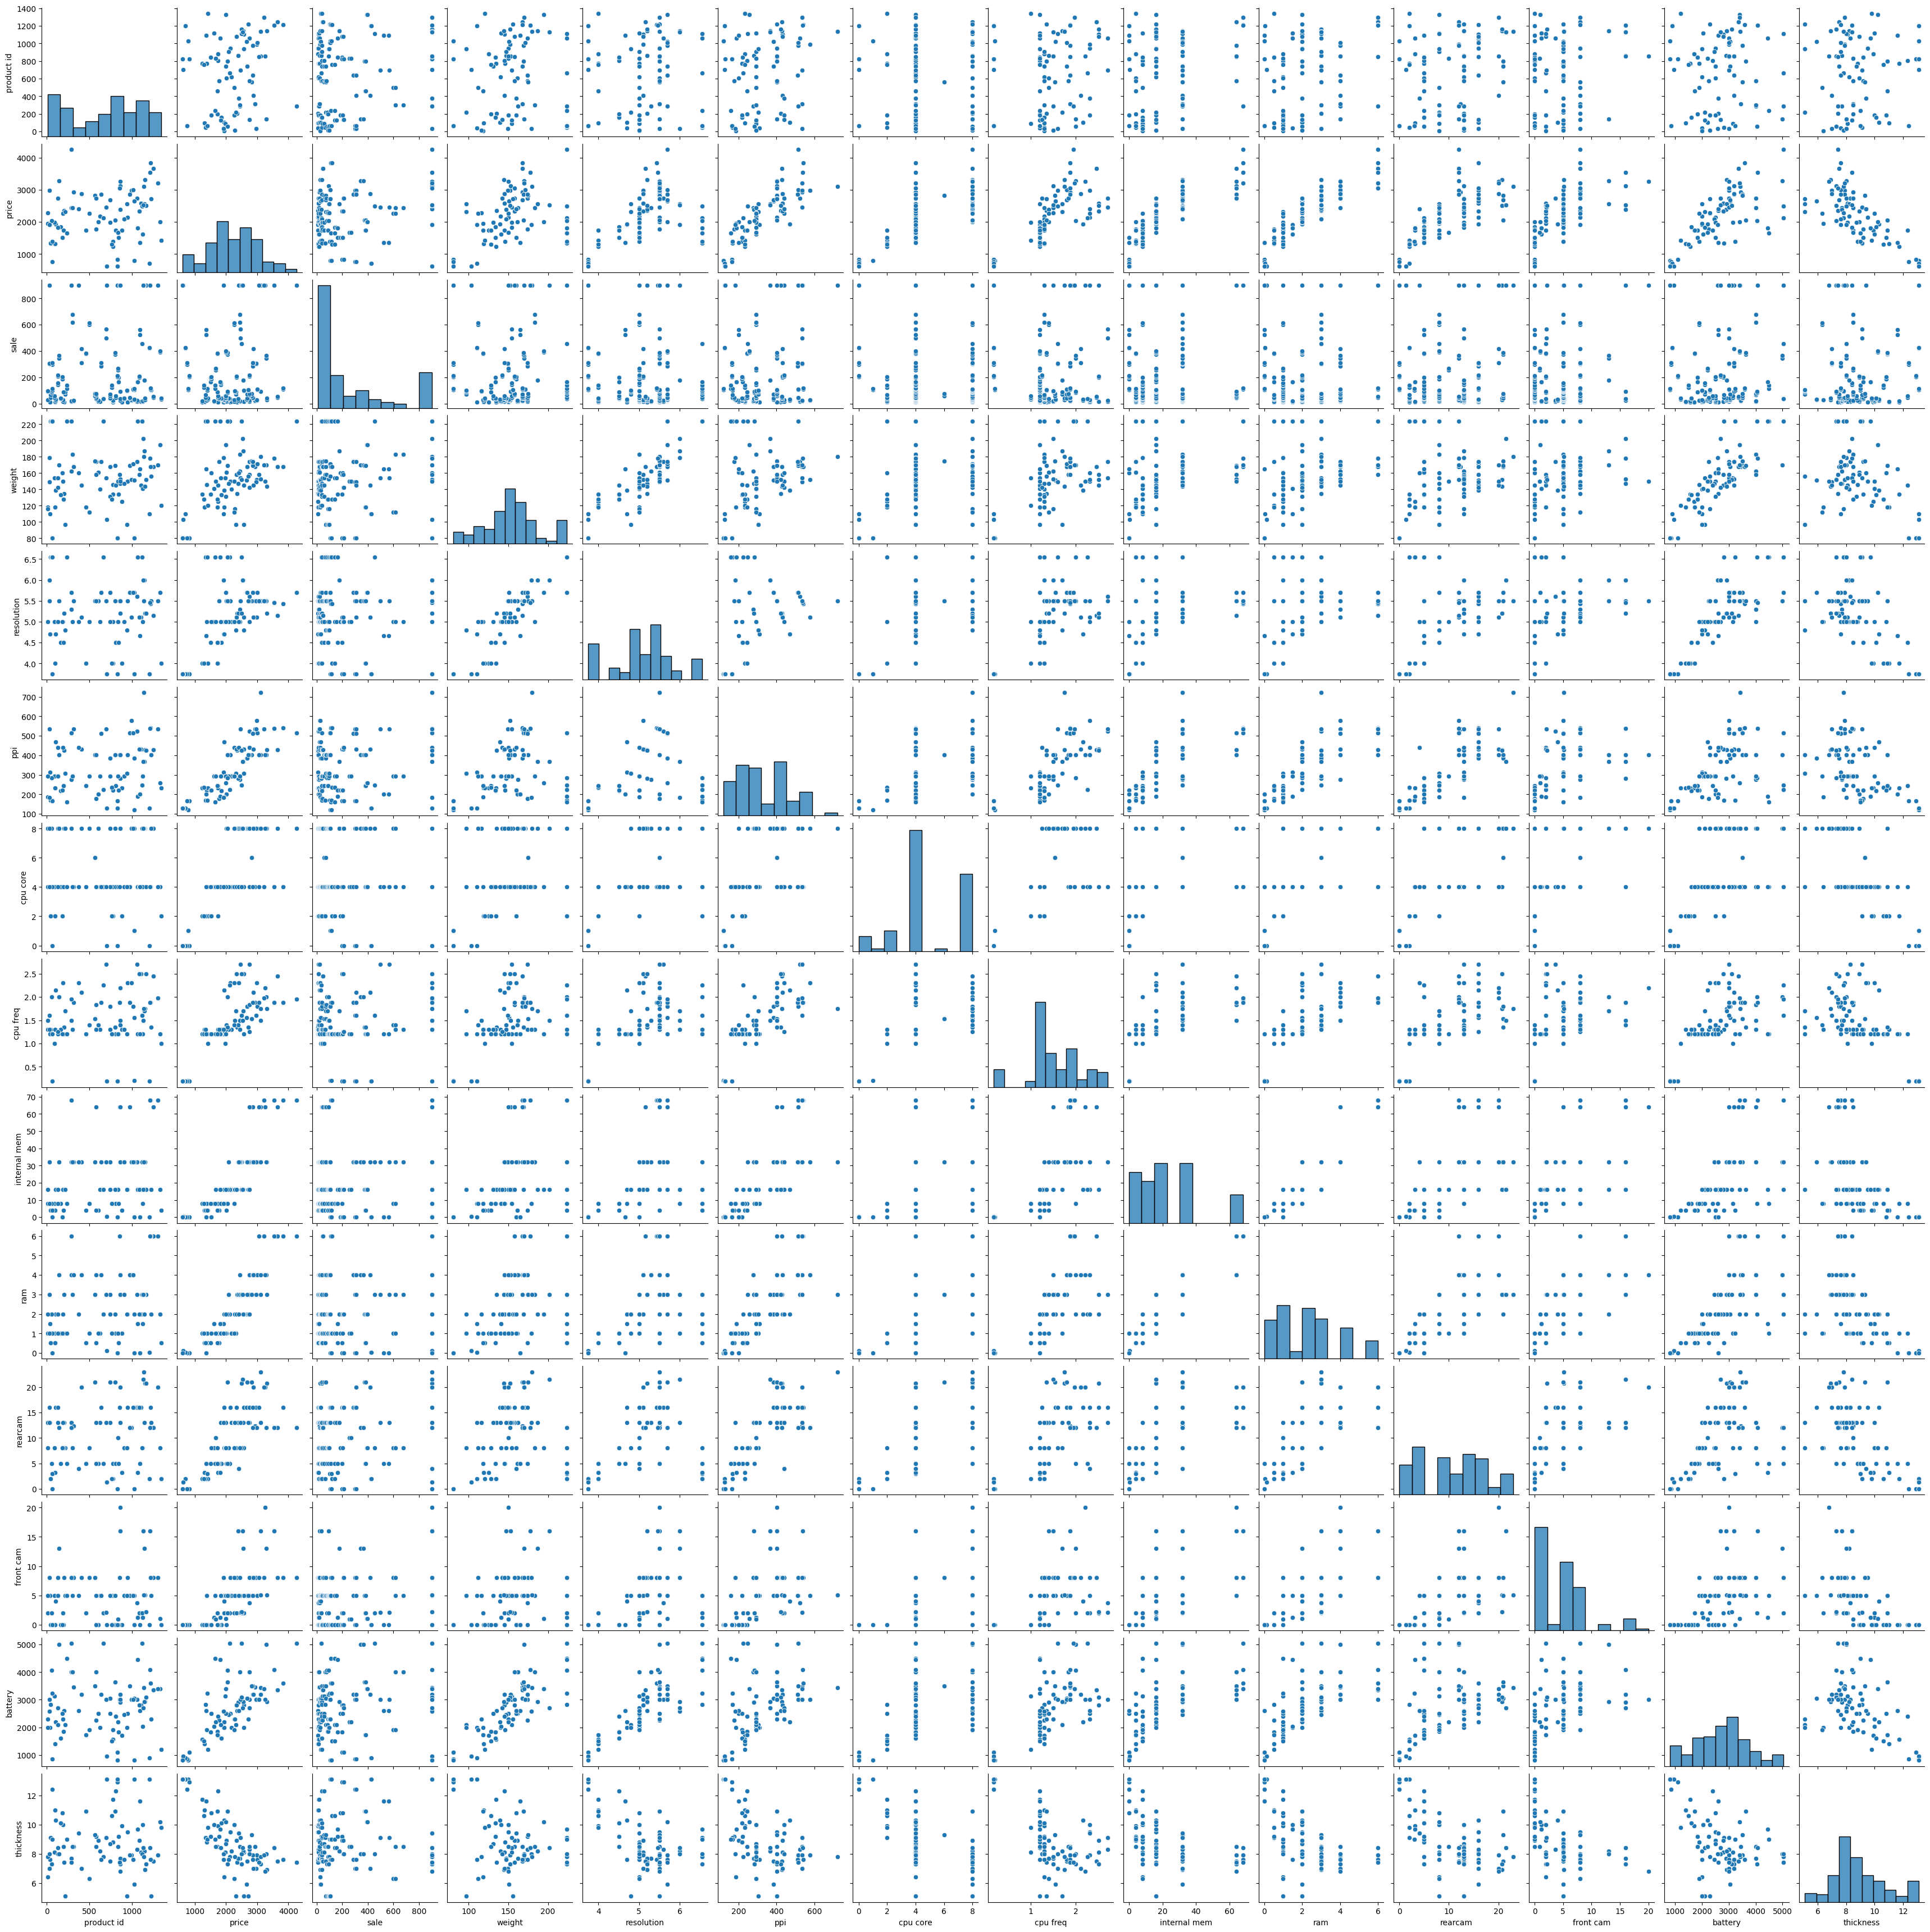

In [6]:
sns.pairplot(mob_dataset)

In [7]:
def quan_qual(dataset):
    quan , qual = [], []
    for i in dataset.columns:
        if dataset[i].dtype == 'O':
            qual.append(i)
        else:
            quan.append(i)
    return quan, qual

In [8]:
quan, qual = quan_qual(mob_dataset)

In [9]:
quan

['product id',
 'price',
 'sale',
 'weight',
 'resolution',
 'ppi',
 'cpu core',
 'cpu freq',
 'internal mem',
 'ram',
 'rearcam',
 'front cam',
 'battery',
 'thickness']

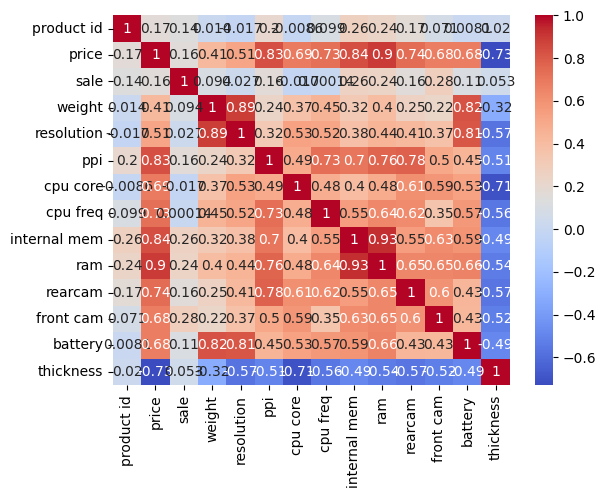

In [10]:
import matplotlib.pyplot as plt
sns.heatmap(mob_dataset[quan].corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
## Calculate variance inflation factor to check multicolinearity

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF
def cal_vif(X):

    # create Empty Dataframe to store columns and its vif values
    vif = pd.DataFrame()

    # store quantitative columns in vif column  "variable"
    vif["variable"] = X.columns

    # store each quantitative column's vif values in vif column  "VIF"
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [13]:
cal_vif(mob_dataset[quan])

,variable,VIF
0,product id,4.456054
1,price,121.538528
2,sale,2.186641
3,weight,143.965745
4,resolution,191.294622
5,ppi,44.247672
6,cpu core,16.596974
7,cpu freq,25.109398
8,internal mem,20.491069
9,ram,36.752957


## All the columns are having VIF > 5 so we can say all the columns are highly correlated except Product_id, Sale, Front Cam columns.

## Check covariance and Correlations

In [14]:
mob_dataset.cov(numeric_only=True)

,product id,price,sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,rearcam,front cam,battery,thickness
product id,168799.023059,52610.252329,17227.469196,206.585074,-4.988165,10988.328494,-8.669643,23.334550,2111.684254,156.219416,438.892228,126.695753,3.343476e+03,15.496910
price,52610.252329,584769.184705,36885.266964,11073.203536,287.691373,83503.927057,1285.453571,316.901779,12554.758785,1104.333046,3509.710951,2247.965846,5.198462e+05,-1029.293292
sale,17227.469196,36885.266964,94414.183929,1013.573839,6.127027,6546.787946,-12.667857,0.024478,1565.193225,118.473754,300.047500,377.773839,3.534016e+04,29.973348
weight,206.585074,11073.203536,1013.573839,1219.109998,22.644031,1079.833117,31.255446,9.015265,220.070823,22.298356,54.669629,33.899004,2.890983e+04,-20.364113
resolution,-4.988165,287.691373,6.127027,22.644031,0.535324,30.526123,0.950446,0.216073,5.378732,0.519855,1.868461,1.178439,5.986399e+02,-0.767809
ppi,10988.328494,83503.927057,6546.787946,1079.833117,30.526123,17261.828086,157.442857,55.176228,1800.237352,161.659631,631.601739,287.022519,5.878764e+04,-122.489938
cpu core,-8.669643,1285.453571,-12.667857,31.255446,0.950446,157.442857,5.973214,0.663587,19.019300,1.900843,9.236250,6.226071,1.309000e+03,-3.194821
cpu freq,23.334550,316.901779,0.024478,9.015265,0.216073,55.176228,0.663587,0.326577,6.126860,0.586294,2.203755,0.880395,3.279680e+02,-0.591077
internal mem,2111.684254,12554.758785,1565.193225,220.070823,5.378732,1800.237352,19.019300,6.126860,379.781120,29.205851,66.602678,53.015924,1.157838e+04,-17.514383
ram,156.219416,1104.333046,118.473754,22.298356,0.519855,161.659631,1.900843,0.586294,29.205851,2.591557,6.449177,4.525797,1.059288e+03,-1.600845


## what is the kind of covarience between Price and Battery

## The covarience value of Price and Battery is 3343.475543 which is a postive values so it is positive covarience and both are increase/decrease together.

In [15]:
mob_dataset.corr(numeric_only=True)

,product id,price,sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,rearcam,front cam,battery,thickness
product id,1.000000,0.167453,0.136464,0.014401,-0.016594,0.203565,-0.008634,0.099385,0.263741,0.236194,0.172812,0.071020,0.008106,0.020458
price,0.167453,1.000000,0.156979,0.414724,0.514193,0.831134,0.687797,0.725169,0.842460,0.897072,0.742471,0.677021,0.677109,-0.730038
sale,0.136464,0.156979,1.000000,0.094475,0.027254,0.162168,-0.016869,0.000139,0.261386,0.239510,0.157969,0.283151,0.114558,0.052907
weight,0.014401,0.414724,0.094475,1.000000,0.886388,0.235392,0.366269,0.451818,0.323426,0.396708,0.253294,0.223599,0.824707,-0.316332
resolution,-0.016594,0.514193,0.027254,0.886388,1.000000,0.317556,0.531515,0.516772,0.377229,0.441361,0.413120,0.370940,0.814954,-0.569172
ppi,0.203565,0.831134,0.162168,0.235392,0.317556,1.000000,0.490315,0.734878,0.703104,0.764325,0.777678,0.503127,0.445675,-0.505657
cpu core,-0.008634,0.687797,-0.016869,0.366269,0.531515,0.490315,1.000000,0.475118,0.399323,0.483128,0.611353,0.586698,0.533472,-0.708992
cpu freq,0.099385,0.725169,0.000139,0.451818,0.516772,0.734878,0.475118,1.000000,0.550146,0.637297,0.623836,0.354805,0.571629,-0.560983
internal mem,0.263741,0.842460,0.261386,0.323426,0.377229,0.703104,0.399323,0.550146,1.000000,0.930942,0.552873,0.626534,0.591775,-0.487447
ram,0.236194,0.897072,0.239510,0.396708,0.441361,0.764325,0.483128,0.637297,0.930942,1.000000,0.648073,0.647470,0.655405,-0.539346


## what is the kind of Correation between Price and Battery

## Correlation between Engine Price and Battery is 0.67 which is greater than 0.54 so it is a positive correlation. 

In [16]:
mob_dataset.head()

,product id,price,sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,rearcam,front cam,battery,thickness
0,203,2357,10.0,135.0,5.2,424.0,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10.0,125.0,4.0,233.0,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10.0,110.0,4.7,312.0,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11.0,118.5,4.0,233.0,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11.0,125.0,4.0,233.0,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# T-test and Hypothesis testing

# Unpaired t-test
# Different group (product_id 203, product id 880) but same condition (price)

In [17]:
from scipy.stats import ttest_ind

In [18]:
product_203_price = mob_dataset[mob_dataset["product id"]==203]["price"]
product_880_price  = mob_dataset[mob_dataset["product id"]==880]["price"]

In [19]:
ttest_ind(product_203_price,product_880_price)

/Users/subhaarunpandian/anaconda3/envs/mlenv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=inf, pvalue=0.0, df=1.0)

In [20]:
# Paired t-test
# Same group (product_id 880) but different conditions (rearcam, frontcam)

In [21]:
product_880_frontcam = mob_dataset[mob_dataset["product id"]==880]["front cam"]
product_880_rearcam = mob_dataset[mob_dataset["product id"]==880]["rearcam"]

In [22]:
from scipy.stats import ttest_rel
ttest_rel(product_880_frontcam, product_880_rearcam)

TtestResult(statistic=-inf, pvalue=0.0, df=1)

# Hypothesis testing

## Hypothesis testing
## Statement: test whether the front cam of product 880 and rearcam of product 880 are same
## Null hupothesis: There is no significant difference between front cam of product 880 and rearcam of product 880 
## Null hupothesis: There is a significant difference between front cam of product 880 and rearcam of product 880 

## H0 - Reject null hypothesis if  p value < 0.05, 
## here the p is < 0.05 the above condition is True so 
## the solution is accept alternative hypothesis

# ANOVA test

In [23]:
from scipy import stats

## Statement: Ho - There is no significant difference between  internal mem,	ram and weight
## H1 - There is a significant difference between internal mem,	ram and weight
## Accept/Reject: if p < 0.05 then reject Ho (null hypothesis),
## or else accept Ho (null hypothesis) and reject H1 (alternate hypothesis)

In [24]:
stats.f_oneway(mob_dataset["internal mem"], mob_dataset["ram"], mob_dataset["weight"])

F_onewayResult(statistic=2064.8610416723895, pvalue=1.6442152643943823e-236)

## Statement: Ho - There is no significant difference between internal mem, ram and weight
## H1 - There is a significant difference between internal mem, ram and weight
## Accept/Reject: if p > 0.05 then accept Ho (null hypothesis),

In [25]:
from statsmodels.formula.api import ols
model = ols(formula= "price ~ weight + ppi + thickness", 
            data=mob_dataset).fit()  


In [26]:
model

In [27]:
import statsmodels.api as sm

In [28]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,6.372397e+06,1.0,67.137299,8.349608e-14
weight,1.967129e+06,1.0,20.724973,1.057076e-05
ppi,2.528440e+07,1.0,266.387387,1.206457e-35
thickness,9.275199e+06,1.0,97.720177,3.230012e-18
Residual,1.490180e+07,157.0,NaN,NaN


# Here p values of all the mentioned columns are > 0.05 so we can accept alternate hypothesis